In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("L6_COMBO.xlsx")

final_merged_df = df.groupby('Stock Code', as_index=False)['ZSCORE_FINAL'].mean()

final_merged_df.head(40)

column_list = final_merged_df['Stock Code'].tolist()
# print(column_list)



In [3]:
df = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/mega_dateclose_final.csv")
columns_to_keep = ['Date'] + [col for col in column_list if col in df.columns]
filtered_with_date_df = df[columns_to_keep]


filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
start_date = pd.to_datetime("2018-03-31")
end_date = pd.to_datetime("2021-04-02")
filtered_df = filtered_with_date_df[(filtered_with_date_df['Date'] >= start_date) & (filtered_with_date_df['Date'] <= end_date)]
filtered_df.head()


df_cleaned = filtered_df.dropna(how='all', subset=filtered_df.columns.difference(['Date']))
rows_removed = len(filtered_df) - len(df_cleaned)
# print("ROWS REMOVED i.e. ALL VALUES MISSING EXCEPT DATE:", rows_removed)
df_cleaned.head()


df_fully_cleaned = df_cleaned.dropna(axis=1)
final_columns = df_fully_cleaned.columns.tolist()
if 'Date' in final_columns:
    final_columns.remove('Date')
print(final_columns)
df_fully_cleaned.head()


df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])
df_fully_cleaned.set_index('Date', inplace=True)
pct_change_df = df_fully_cleaned.pct_change() 
pct_change_df = pct_change_df.iloc[1:] 
pct_change_df.head()
# pct_change_df.to_csv("gptwork.csv",index=False)



pct_change_df = pct_change_df.reset_index()  # This moves 'Date' from index to a regular column
pct_change_df.head()
# pct_change_df.to_csv("data1.csv",index=False) 





# pct_change_df.to_csv("deletenow.csv",index=False)
# nan_counts = pct_change_df.isna().sum()
# print(nan_counts)
# columns_without_nans = df.columns[df.isna().sum() == 0].tolist()
# print(columns_without_nans)

# pct_change_df.dropna

['APLLTD', 'BHARATWIRE', 'BRNL', 'CANFINHOME', 'CDSL', 'CESC', 'CHOLAHLDNG', 'DISHTV', 'ERIS', 'GODREJPROP', 'GREENPOWER', 'GSPL', 'IEX', 'INFIBEAM', 'KAJARIACER', 'KEC', 'MUTHOOTFIN', 'NAM-INDIA', 'NBCC', 'NITCO', 'PRESTIGE', 'QUESS', 'SCHAEFFLER', 'SIS', 'SUNTECK', 'THOMASCOOK', 'UNOMINDA', 'WELENT']


C:\Users\meets\AppData\Local\Temp\ipykernel_8604\589767982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
C:\Users\meets\AppData\Local\Temp\ipykernel_8604\589767982.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])


,Date,APLLTD,BHARATWIRE,BRNL,CANFINHOME,CDSL,CESC,CHOLAHLDNG,DISHTV,ERIS,...,NBCC,NITCO,PRESTIGE,QUESS,SCHAEFFLER,SIS,SUNTECK,THOMASCOOK,UNOMINDA,WELENT
0,2018-04-03,-0.006341,0.002578,-0.008041,0.000465,0.018401,0.017722,0.015723,-0.006190,0.003309,...,0.055765,0.048677,-0.000337,-0.012801,-0.010711,-0.004500,-0.009550,-0.032793,0.033866,0.036030
1,2018-04-04,0.017018,-0.030433,-0.014861,-0.003140,-0.023653,-0.027861,-0.004380,-0.022145,-0.022713,...,-0.034261,-0.008577,-0.013300,0.008545,-0.008992,0.017107,-0.010727,-0.025609,-0.013889,-0.029199
2,2018-04-05,0.001364,0.072060,0.000274,0.024965,0.037685,0.022518,0.000683,0.013447,0.012353,...,0.022173,0.078372,0.029517,0.041921,0.003842,0.007582,-0.001584,0.019619,0.004252,0.037175
3,2018-04-06,-0.017710,-0.007835,-0.006032,0.032324,-0.012322,0.002002,-0.007124,0.006983,0.000314,...,0.000000,0.000944,0.021876,0.009267,-0.003551,-0.014011,0.007932,0.016155,-0.003969,-0.023460
4,2018-04-09,-0.007581,-0.026185,0.042483,-0.003087,-0.002955,0.016983,0.005267,0.008322,-0.000880,...,0.013015,-0.007544,0.014921,-0.006558,-0.018974,-0.022456,0.013196,0.001429,-0.002657,0.019353


In [4]:
# PORTFOLIO WT CALCULATION

final_df = final_merged_df[final_merged_df['Stock Code'].isin([name.upper() for name in final_columns])]
final_df.head()



# Step 1: Initial weights from Z-score
final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"] / final_df["ZSCORE_FINAL"].sum()

# Step 2: Cap and redistribute iteratively
cap = 0.07
weights = final_df['PORTFOLIO_WEIGHTS'].copy()

while True:
    over_cap = weights > cap
    if not over_cap.any():
        break  # Exit loop if no weights are over the cap

    # Cap the overweight stocks
    weights[over_cap] = cap

    # Redistribute the excess weight
    total_weight = weights.sum()
    excess = 1.0 - total_weight

    # Identify stocks eligible to receive excess (not capped)
    under_cap = weights < cap
    allocatable = weights[under_cap]
    scaling_sum = allocatable.sum()

    if scaling_sum == 0:
        break  # Avoid divide by zero

    # Distribute excess proportionally
    weights[under_cap] += (allocatable / scaling_sum) * excess

final_df['PORTFOLIO_WEIGHTS'] = weights

# Final checks (optional)
print("Max weight:", final_df['PORTFOLIO_WEIGHTS'].max())  # Should be <= 0.07
print("Total weight:", final_df['PORTFOLIO_WEIGHTS'].sum())  # Should be ~1.0


final_df = final_df[["Stock Code","PORTFOLIO_WEIGHTS"]]
final_df.head(20)


final_df.to_csv("L6_COMBO_OP_NEW.csv",index=False)

Max weight: 0.07
Total weight: 1.0


C:\Users\meets\AppData\Local\Temp\ipykernel_8604\394063875.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"] / final_df["ZSCORE_FINAL"].sum()
C:\Users\meets\AppData\Local\Temp\ipykernel_8604\394063875.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PORTFOLIO_WEIGHTS'] = weights


In [5]:
#DIRECT COPYPASTE - NO EDIT


# Align columns: ensure weights match the columns in the return dataframe
returns_df = pct_change_df.copy()
weights_df = final_df.set_index("Stock Code")["PORTFOLIO_WEIGHTS"]

# Ensure only common stocks are used
common_stocks = returns_df.columns.intersection(weights_df.index)
returns_matrix = returns_df[common_stocks].copy()
weights_vector = weights_df.loc[common_stocks]

# Perform matrix multiplication (dot product) for each date
returns_df["Portfolio Return"] = returns_matrix.dot(weights_vector)

# Show a few results
final_portfolio = returns_df[["Date", "Portfolio Return"]]
final_portfolio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              744 non-null    datetime64[ns]
 1   Portfolio Return  744 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.8 KB


In [6]:
#DIRECT COPYPASTE - NO EDIT

df2 = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/BENCHMARK/BSE500_PCTRETURNS_09-25.csv")
df2['BDP_Date'] = pd.to_datetime(df2['BDP_Date'])

final_portfolio_benchmark = pd.merge(final_portfolio, df2, how='inner', left_on='Date', right_on='BDP_Date')
final_portfolio_benchmark = final_portfolio_benchmark.drop('BDP_Date', axis=1)
final_portfolio_benchmark.set_index('Date', inplace=True)
final_portfolio_benchmark = final_portfolio_benchmark.rename(columns={'Portfolio Return':'Strategy'})
final_portfolio_benchmark.head()
final_portfolio_benchmark.to_csv("L6_COMBO_FINAL_NEW.csv")
# final_portfolio_benchmark.to_csv("final_portfolio_benchmarkQ.csv")

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2018-04-03   2018-04-03
End Period                 2021-04-01   2021-04-01
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          38.98%       -0.37%
CAGR﹪                     7.88%        -0.08%

Sharpe                     0.64         0.11
Prob. Sharpe Ratio         85.62%       57.39%
Smart Sharpe               0.53         0.09
Sortino                    0.85         0.14
Smart Sortino              0.7          0.12
Sortino/√2                 0.6          0.1
Smart Sortino/√2           0.49         0.08
Omega                      1.02         1.02

Max Drawdown               -38.39%      -58.42%
Longest DD Days            495          1066
Volatility (ann.)          20.84%       22.63%
R^2                        0.63         0.63
Information Ratio          -0.05        -0.05
Calmar            

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2018-05-02,2020-03-24,2021-04-01,1066,-58.416124,-55.380668
2,2018-04-04,2018-04-04,2018-04-04,1,-0.792862,NaN
3,2018-04-17,2018-04-26,2018-04-26,10,-0.643650,-0.560246
4,2018-04-11,2018-04-12,2018-04-12,2,-0.179583,-0.005176


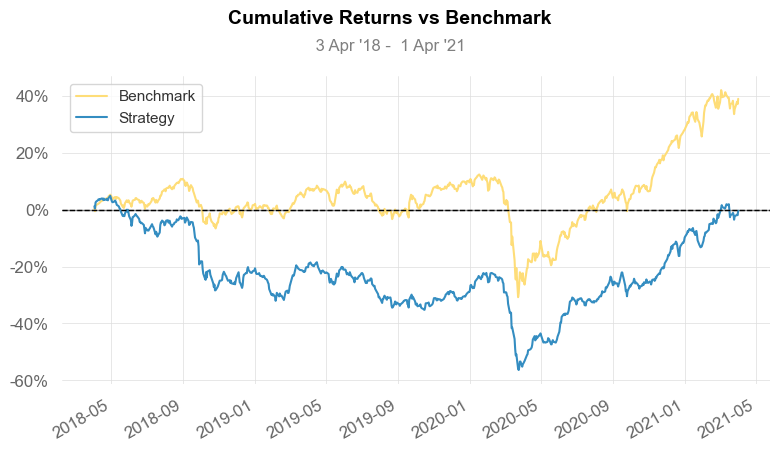

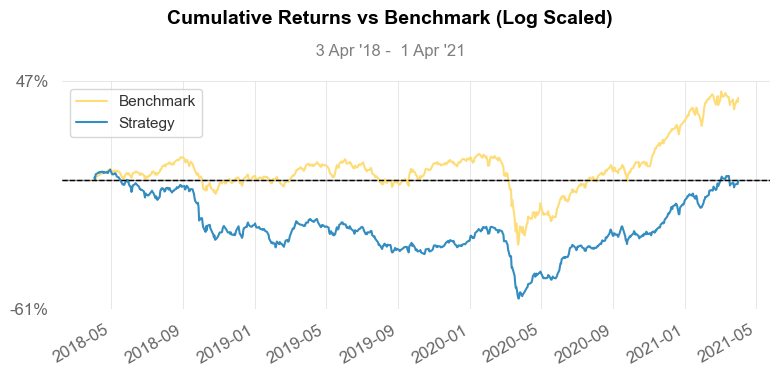

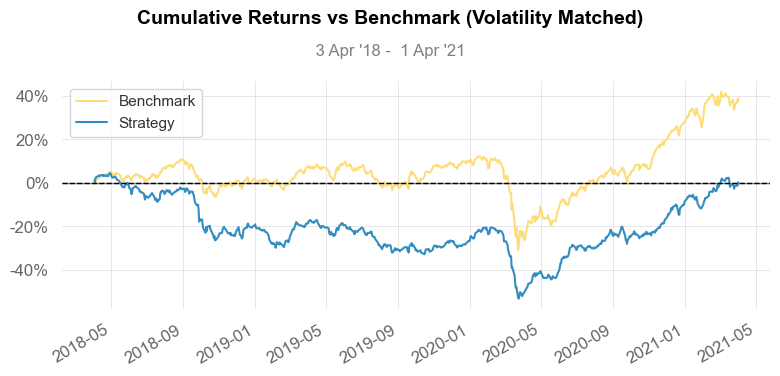

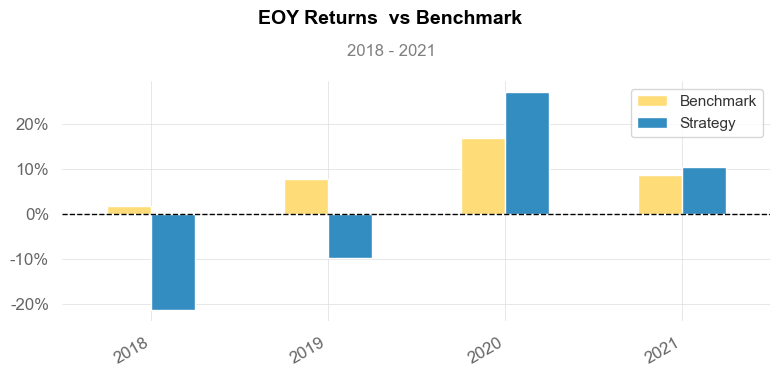

OptionError: No such keys(s): 'mode.use_inf_as_null'

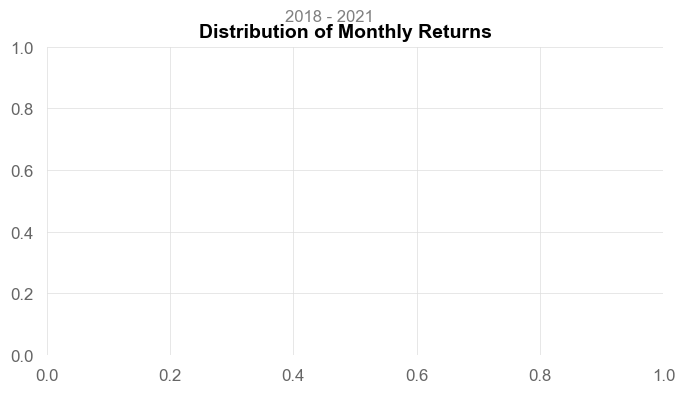

In [7]:
import quantstats as qs

final_portfolio_benchmark.index = pd.to_datetime(final_portfolio_benchmark.index)

qs.reports.full(final_portfolio_benchmark['Strategy'],benchmark = final_portfolio_benchmark['BDP_Close'],mode="full")